In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv("ai4i2020.csv")

In [3]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [32]:
data.shape

(10000, 14)

In [4]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
data["Machine failure"].unique()

array([0, 1], dtype=int64)

In [6]:
data["Type"].unique()

array(['M', 'L', 'H'], dtype=object)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

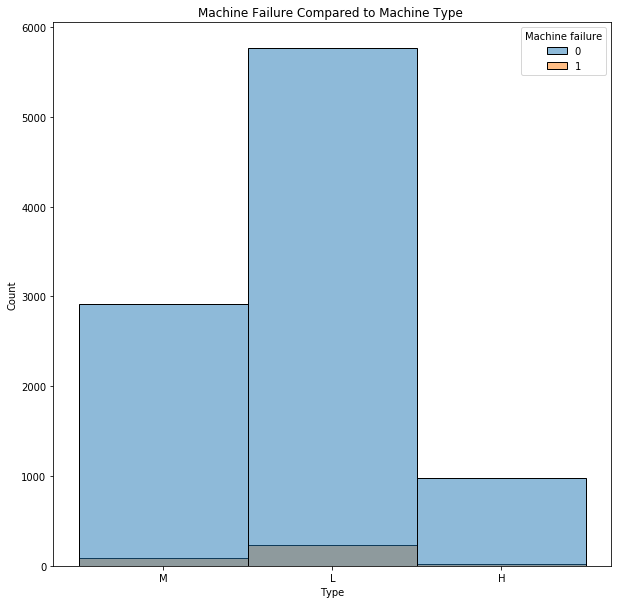

In [56]:
plt.figure(figsize=(10, 10))
plt.title("Machine Failure Compared to Machine Type ")
sns.histplot(x="Type", hue="Machine failure", data=data)
plt.show()

In [8]:
n=data[["TWF","HDF","PWF","OSF","RNF","Machine failure"]]
n.head()

,TWF,HDF,PWF,OSF,RNF,Machine failure
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [60]:
#df = pd.DataFrame (n,columns=["Machine failure","TWF","HDF","PWF","OSF","RNF"])

In [9]:
#df.head()
n.shape

(10000, 6)

In [10]:
n.describe()

,TWF,HDF,PWF,OSF,RNF,Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.004600,0.011500,0.009500,0.009800,0.00190,0.033900
std,0.067671,0.106625,0.097009,0.098514,0.04355,0.180981
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


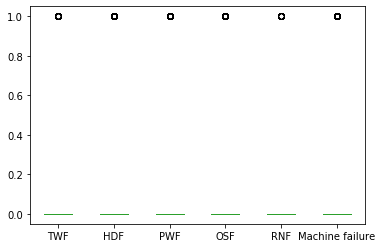

In [16]:
ax = n.plot.box()

In [50]:
from sklearn import tree
X=data.iloc[:,3:-1]
Y=data.iloc[:,-1]

In [51]:
print(X.shape)
print(Y.shape)

(10000, 10)
(10000,)


In [52]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0


In [53]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: RNF, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [55]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [60]:
prediction=clf.predict(X_test)

In [62]:
print(confusion_matrix(Y_test,prediction))

[[3292    0]
 [   0    8]]


In [63]:
classification_report(Y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3292\n           1       1.00      1.00      1.00         8\n\n    accuracy                           1.00      3300\n   macro avg       1.00      1.00      1.00      3300\nweighted avg       1.00      1.00      1.00      3300\n'